# **Busines Case : YULU -Hypothesis Testing**

# **About YULU**
### **Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.**

### **Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!**

# **Business Problem :**
### **Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.**

## **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, ttest_1samp, ttest_ind, chi2_contingency, f, f_oneway
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as spy

## **Downloading the dataset**

In [3]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

--2023-09-05 17:55:42--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.183, 108.157.172.173, 108.157.172.10, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘bike_sharing.csv?1642089089’

bike_sharing.csv?16 100%[===================>] 633.16K  --.-KB/s    in 0.09s   

2023-09-05 17:55:42 (7.11 MB/s) - ‘bike_sharing.csv?1642089089’ saved [648353/648353]



## **Reading the dataset**

In [4]:
df=pd.read_csv("bike_sharing.csv?1642089089")
df.head(15)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


Column Profiling:

 - datetime: datetime
 - season: season (1: spring, 2: summer, 3: fall, 4: winter)
 - holiday: whether day is a holiday or not
 - workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
 - weather:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +
Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 - temp: temperature in Celsius
 - atemp: feeling temperature in Celsius
 - humidity: humidity
 - windspeed: wind speed
 - casual: count of casual users
 - registered: count of registered users
 - count: count of total rental bikes including both casual and registered




## **Checking the structure**

In [5]:
df.shape

(10886, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## **Missing values**

In [7]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## **Conversion of Data types**

In [8]:
df['season']=df['season'].astype('category')
df['holiday']=df['holiday'].astype('category')
df['workingday']=df['workingday'].astype('category')
df['weather']=df['weather'].astype('category')
df['datetime']=pd.to_datetime(df['datetime'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


## **Descriptive Satistics**

In [10]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [11]:
df.describe(include='category')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


## **Time period for the which is data is given**

In [12]:
df['datetime'].max() - df['datetime'].min()

Timedelta('718 days 23:00:00')

## **The trend of the monthly average values for the 'casual', 'registered', and 'count' variables.**

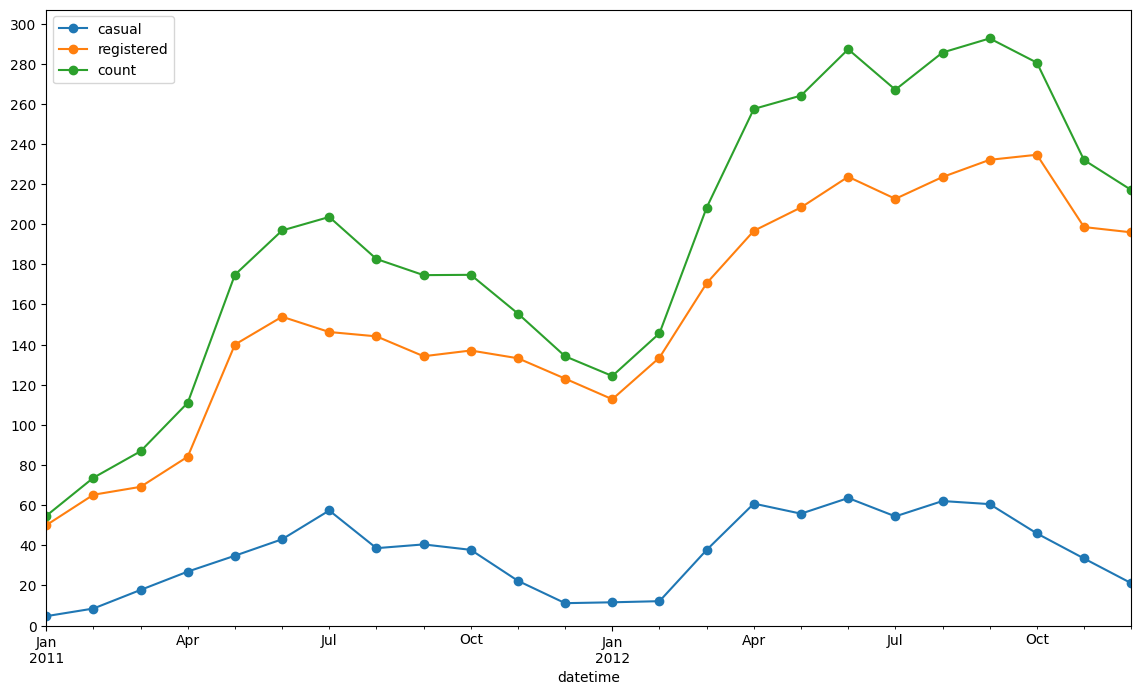

In [13]:
df.set_index('datetime', inplace = True)
plt.figure(figsize = (14, 8))
df.resample('M')['casual'].mean().plot(kind = 'line', legend = 'casual', marker = 'o')
df.resample('M')['registered'].mean().plot(kind = 'line', legend = 'registered', marker = 'o')
df.resample('M')['count'].mean().plot(kind = 'line', legend = 'count', marker = 'o')
plt.yticks(np.arange(0, 301, 20))
plt.ylim(0,)
plt.show()

## **The trend of the monthly total values for the 'casual', 'registered', and 'count' variables.**

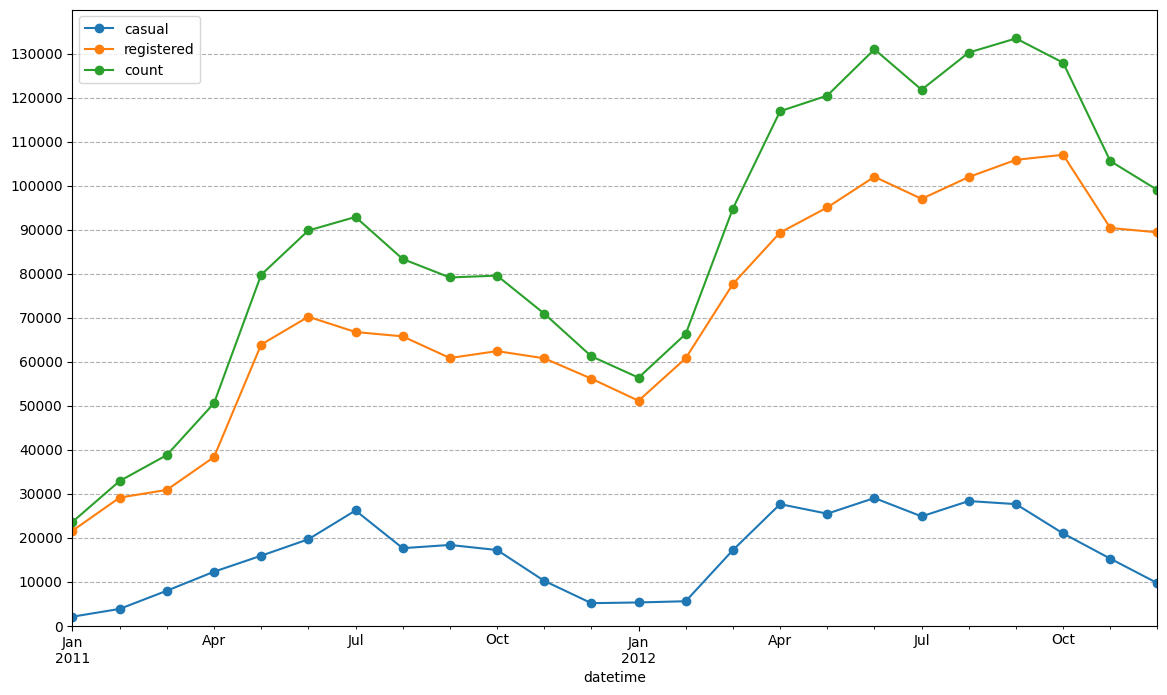

In [14]:
plt.figure(figsize = (14, 8))
df.resample('M')['casual'].sum().plot(kind = 'line', legend = 'casual', marker = 'o')
df.resample('M')['registered'].sum().plot(kind = 'line', legend = 'registered', marker = 'o')
df.resample('M')['count'].sum().plot(kind = 'line', legend = 'count', marker = 'o')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 130001, 10000))
plt.ylim(0,)
plt.show()

## **Checking increase in the average hourly count of rental bikes from the year 2011 to 2012.**

In [15]:
df1=df.resample('Y')['count'].mean().to_frame().reset_index()
df1['prev_count'] = df1['count'].shift(1)
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1

,datetime,count,prev_count,growth_percent
0,2011-12-31,144.223349,NaN,NaN
1,2012-12-31,238.560944,144.223349,65.410764


 - This data suggests that there was substantial growth in the count of the variable over the course of one year.
 - The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.

In [16]:
df.reset_index(inplace=True)

## **How does the average hourly count of rental bikes varies for different month ?**

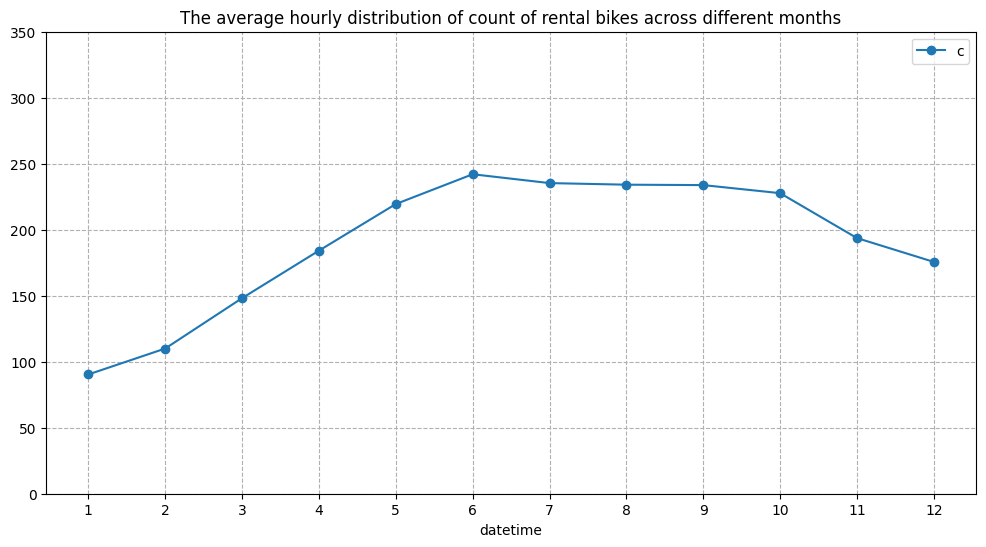

In [17]:
plt.figure(figsize = (12, 6))
plt.title("The average hourly distribution of count of rental bikes across different months")
df.groupby(by = df['datetime'].dt.month)['count'].mean().plot(kind = 'line', marker = 'o')
plt.ylim(0,)
plt.xticks(np.arange(1, 13))
plt.legend('count')
plt.yticks(np.arange(0, 400, 50))
plt.grid(axis = 'both', linestyle = '--')
plt.show()

 - The count of rental bikes shows an increasing trend from January to March.
 - The growth rate starts to stabilize from April to June, with a relatively smaller growth rate.
 - From July to September, there is a slight decrease in the count of rental bikes, with negative growth rates.
 - The count further declines from October to December, with the largest drop observed between October and November.
 - The average hourly count of rental bikes is the highest in the month of June followed by July and August.
 - The average hourly count of rental bikes is the lowest in the month of January followed by February and March

## **What is the distribution of average count of rental bikes on an hourly basis in a single day ?**

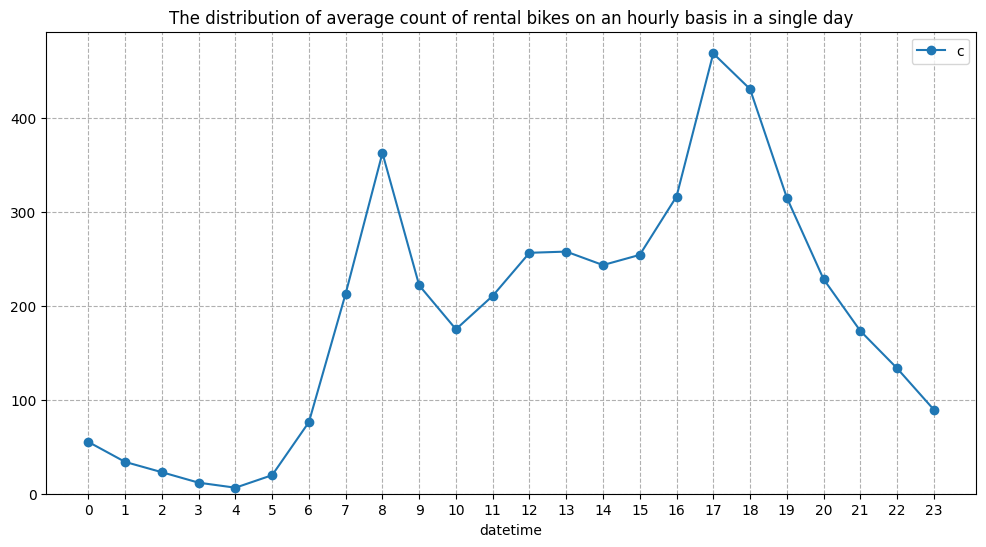

In [18]:
plt.figure(figsize = (12, 6))
plt.title("The distribution of average count of rental bikes on an hourly basis in a single day")
df.groupby(by = df['datetime'].dt.hour)['count'].mean().plot(kind = 'line', marker = 'o')
plt.ylim(0,)
plt.xticks(np.arange(0, 24))
plt.legend('count')
plt.grid(axis = 'both', linestyle = '--')
plt.show()

 - During the early morning hours (hours 0 to 5), there is a significant decrease in the count, with negative growth.
 - However, starting from hour 5, there is a sudden increase in count, with a sharp positive growth from hour 4 to hour 5.
 - The count continues to rise significantly until reaching its peak at hour 17, with a growth compared to the previous hour.
 - After hour 17, there is a gradual decrease in count, with negative growth  during the late evening and nighttime hours.


 - The average count of rental bikes is the highest at 5 PM followed by 6 PM and 8 AM of the day.
 - The average count of rental bikes is the lowest at 4 AM followed by 3 AM and 5 AM of the day.

# **FEATURE : 'season'**

In [19]:
# 1: spring, 2: summer, 3: fall, 4: winter
def season_category(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'
df['season'] = df['season'].apply(season_category)

In [20]:
df['season'].value_counts()

winter    2734
summer    2733
fall      2733
spring    2686
Name: season, dtype: int64

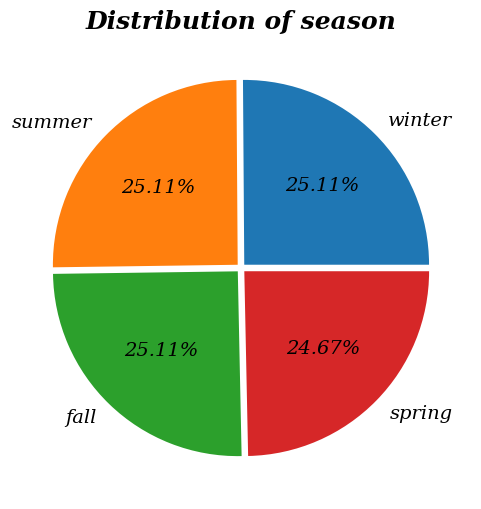

In [21]:
plt.figure(figsize=(6,6))
plt.title('Distribution of season', fontdict={'fontsize' : 18,'fontweight' : 600,'fontstyle' : 'oblique','fontfamily' : 'serif'})
df_season=np.round(df['season'].value_counts(normalize=True)*100,2).to_frame()
plt.pie(x = df_season['season'], explode = [0.025, 0.025, 0.025, 0.025], labels = df_season.index, autopct = '%.2f%%',
        textprops = {'fontsize' : 14,'fontstyle' : 'oblique','fontfamily' : 'serif','fontweight' : 500})
plt.show()

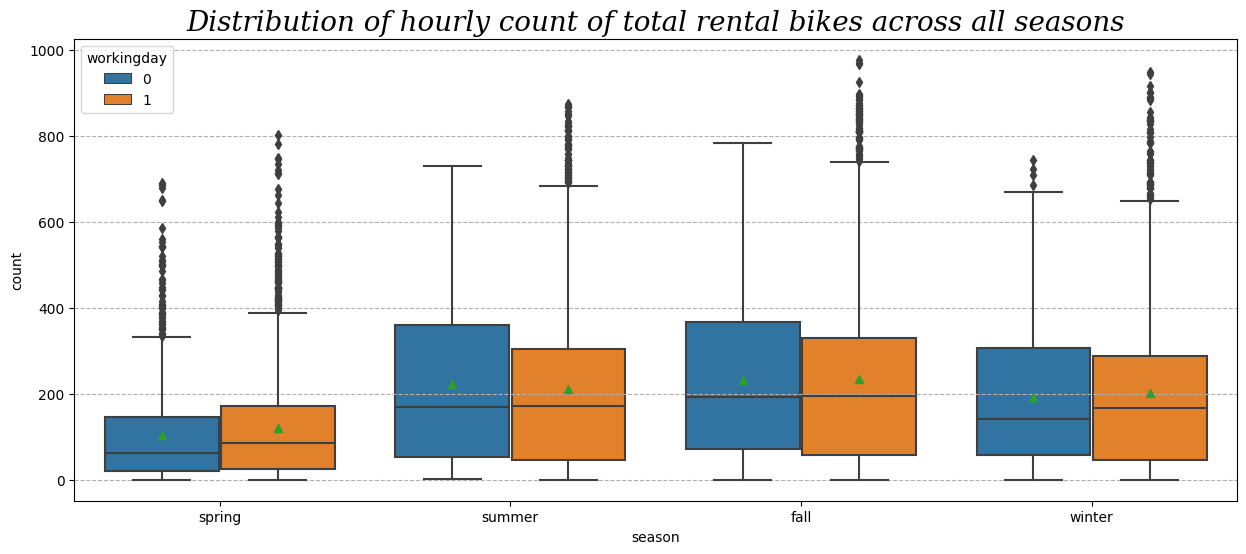

In [22]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all seasons',fontdict = {'size' : 20,'style' : 'oblique','family' : 'serif'})
sns.boxplot(data = df, x = 'season', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.show()

 - The hourly count of total rental bikes is higher in the fall season, followed by the summer and winter seasons. It is generally low in the spring season.

# **Weather is dependent on season ?**

# **Statistical test : Checking Dependancy between two categorical variables 'season' and 'weather'.**


## **Setting up Null and Alternate hypothesis**
### **- Null Hypothesis ( H0 ) - weather is independent of season.**
### **- Alternate Hypothesis ( HA ) - weather is dependent of seasons.**

In [23]:
cross_table = pd.crosstab(index = df['season'],
                          columns = df['weather'],
                          values = df['count'],
                          aggfunc = np.sum).replace(np.nan, 0)
cross_table

weather,1,2,3,4
season,,,,
spring,223009,76406,12919,164
summer,426350,134177,27755,0
fall,470116,139386,31160,0
winter,356588,157191,30255,0


Based on p-value, we will accept or reject H0.

 - p-val > alpha : fail to reject H0
 - p-val < alpha : Reject H0

Alpha in this case is 0.05.

In [24]:
chi_test_stat, p_value, dof, expected = chi2_contingency(cross_table)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('dof =', dof)
print('-' * 65)
print("Expected : '\n'", expected)
alpha = 0.05
if p_value <alpha :
 print("Interpretation : Reject Ho which states weather is dependant on season")
else:
 print("Interpretation : Fail to Reject Ho which states weather is independant of season")

Test Statistic = 11769.559450959445
p value = 0.0
dof = 9
-----------------------------------------------------------------
Expected : '
' [[2.21180553e+05 7.59953534e+04 1.52975188e+04 2.45745681e+01]
 [4.16375587e+05 1.43062351e+05 2.87978002e+04 4.62619795e+01]
 [4.53449224e+05 1.55800469e+05 3.13619255e+04 5.03810967e+01]
 [3.85057636e+05 1.32301826e+05 2.66317555e+04 4.27823557e+01]]
Interpretation : Reject Ho which states weather is dependant on season


# **Statistical test : Checking Dependancy between two categorical variables 'season' and 'workingday'.**


## **Setting up Null and Alternate hypothesis**
### **- Null Hypothesis ( H0 ) - workingday is independent of season.**
### **- Alternate Hypothesis ( HA ) - workingday is dependent of season.**

In [25]:
season_workingday=pd.crosstab(df['season'],df['workingday'],values=df['count'],aggfunc=np.sum)
season_workingday

workingday,0,1
season,,
spring,90714,221784
summer,187062,401220
fall,206478,434184
winter,170618,373416


Based on p-value, we will accept or reject H0.

 - p-val > alpha : Fail to reject H0
 - p-val < alpha : Reject H0

Alpha in this case is 0.05.

In [26]:
chi_test_stat, p_value, dof, expected = chi2_contingency(season_workingday)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('dof =', dof)
print('-' * 65)
print("Expected : '\n'", expected)
alpha = 0.05
if p_value <alpha :
 print("Interpretation : Reject Ho which states workingday is dependant on season")
else:
 print("Interpretation : Fail to Reject Ho which states workingday is independant of season")

Test Statistic = 1063.7242323100377
p value = 2.697615892729217e-230
dof = 3
-----------------------------------------------------------------
Expected : '
' [[ 98129.24735456 214368.75264544]
 [184729.7259254  403552.2740746 ]
 [201177.86311806 439484.13688194]
 [170835.16360198 373198.83639802]]
Interpretation : Reject Ho which states workingday is dependant on season


# **Statistical test : Checking Dependancy between two categorical variables 'season' and 'holiday'.**


## **Setting up Null and Alternate hypothesis**
### **- Null Hypothesis ( H0 ) - holiday is independent of season.**
### **- Alternate Hypothesis ( HA ) - holiday is dependent of season.**

In [27]:
season_holiday=pd.crosstab(df['season'],df['holiday'],values=df['count'],aggfunc=np.sum)
season_holiday

holiday,0,1
season,,
spring,307249,5249
summer,578786,9496
fall,617831,22831
winter,523802,20232


Based on p-value, we will accept or reject H0.

 - p-val > alpha : Fail to reject H0
 - p-val < alpha : Reject H0

Alpha in this case is 0.05.

In [28]:
chi_test_stat, p_value, dof, expected = chi2_contingency(season_holiday)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('dof =', dof)
print('-' * 65)
print("Expected : '\n'", expected)
alpha = 0.05
if p_value <alpha :
 print("Interpretation : Reject Ho which states holiday is dependant on season")
else:
 print("Interpretation : Fail to Reject Ho which states holiday is independant of season")

Test Statistic = 7609.189844645575
p value = 0.0
dof = 3
-----------------------------------------------------------------
Expected : '
' [[303835.76443172   8662.23556828]
 [571975.21638993  16306.78361007]
 [622903.27782051  17758.72217949]
 [528953.74135785  15080.25864215]]
Interpretation : Reject Ho which states holiday is dependant on season


# **Is the number of cycles rented is similar or different in different season ?**


# **Statistical test : Checking relation between categorical variable and numerical variable 'season' and 'count'.**


## **Setting up Null and Alternate hypothesis**
### **- Null Hypothesis ( H0 ) - Mean no. of cycles rented is same for different season**
### **- Alternate Hypothesis ( HA ) - Mean no. of cycles rented is different for different season**

In [29]:
df.groupby(['season'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
spring,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [30]:
spring= df.loc[df["season"]=="spring"]["count"]
summer= df.loc[df["season"]=="summer"]["count"]
fall= df.loc[df["season"]=="fall"]["count"]
winter= df.loc[df["season"]=="winter"]["count"]

### **Graphical analysis for checking Normalcy**

<Axes: xlabel='count', ylabel='Density'>

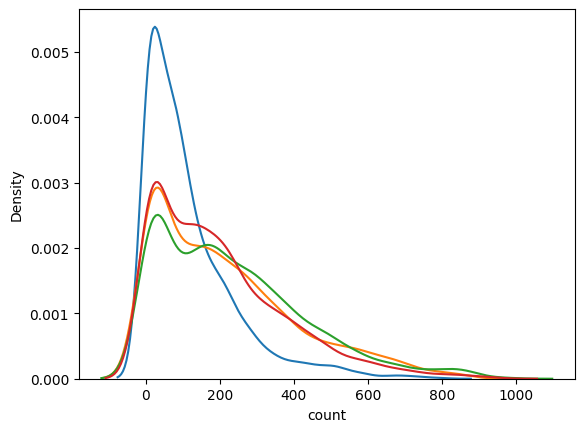

In [31]:
sns.kdeplot(spring)
sns.kdeplot(summer)
sns.kdeplot(fall)
sns.kdeplot(winter)

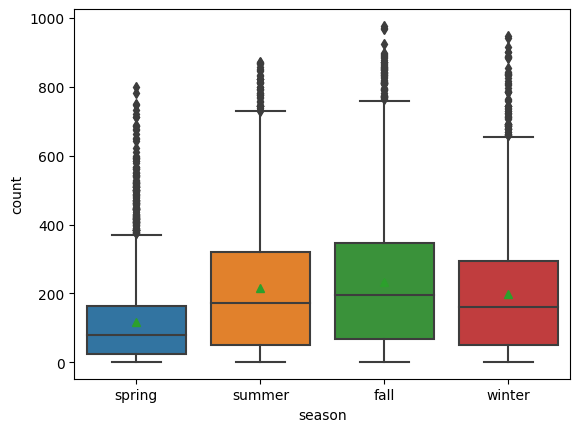

In [32]:
sns.boxplot(data = df, x = 'season', y = 'count', showmeans = True)
plt.show()

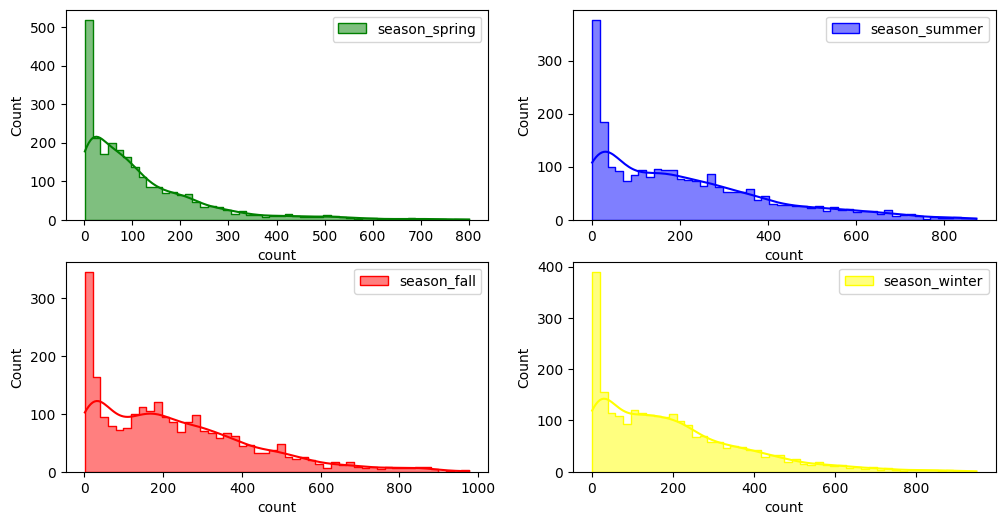

In [33]:
plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.histplot(spring.sample(2500) , bins = 50,
             element = 'step', color = 'green', kde = True, label = 'season_spring')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(summer.sample(2500), bins = 50,
             element = 'step', color = 'blue', kde = True, label = 'season_summer')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(fall.sample(2500), bins = 50,
             element = 'step', color = 'red', kde = True, label = 'season_fall')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(winter.sample(2500), bins = 50,
             element = 'step', color = 'yellow', kde = True, label = 'season_winter')
plt.legend()
plt.show()

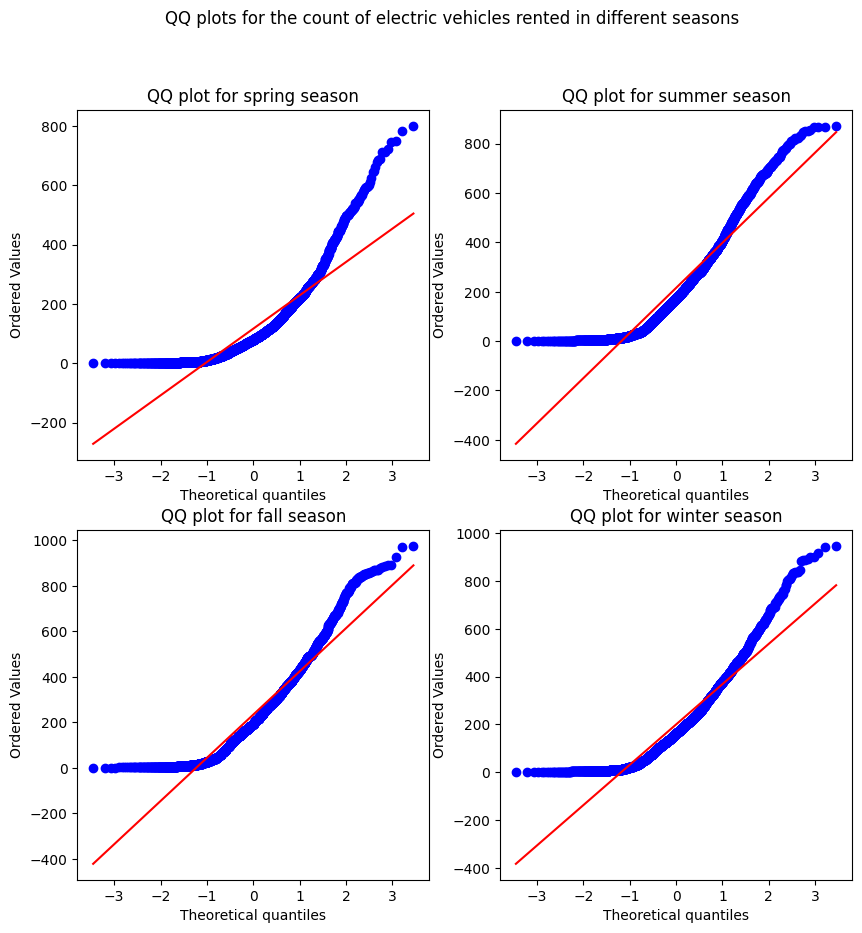

In [34]:
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different seasons')
spy.probplot(spring.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for spring season')

plt.subplot(2, 2, 2)
spy.probplot(summer.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for summer season')

plt.subplot(2, 2, 3)
spy.probplot(fall.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for fall season')

plt.subplot(2, 2, 4)
spy.probplot(winter.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for winter season')
plt.show()

### **The results:-**
 - Kde plot shows significant difference between the plots, not a proper distribution.
 - Box plot shows there is difference between the different categories but we need to check the normalcy of the data and the proving the difference significant.
 - Histogram shows data is not following bell curve, the distribution are not normally distributed.
 - QQ plot evidently proves that the data is not normally distributed, the quantiles on both axis are not aligned.

### **Homogeneity of Variances using Levene's test**
 - Null Hypothesis(H0) - Homogenous Variance

 - Alternate Hypothesis(HA) - Non Homogenous Variance

In [35]:
test_stat, p_value = spy.levene(spring.sample(2500),summer.sample(2500),fall.sample(2500),winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have homogenous Variance')
else:
    print('The samples have homogenous Variance ')

p-value 3.997365660405726e-114
The samples do not have homogenous Variance


### **Homogeneity of Distribution using KStest**
 - Null Hypothesis(H0) - Distributions are same.

 - Alternate Hypothesis(HA) - Distributions are different

In [36]:
spy.kstest(spring.sample(2500),summer.sample(2500),fall.sample(2500),winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are different')
else:
    print('The samples are same')

p-value 3.997365660405726e-114
The samples are different


### **Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.**

In [37]:
test_stat, p_value = spy.kruskal(spring.sample(2500),summer.sample(2500),fall.sample(2500),winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Null hypothesis which states mean no. of cycles rented is different for different season')
else:
    print('Fail to reject the Null hypothesis which states mean no. of cycles rented is same for different season')

p-value 4.1763655852883544e-134
Reject Null hypothesis which states mean no. of cycles rented is different for different season


# **Statistical test : Checking relation between categorical variable and numerical variable 'season' and 'humidity'.**


## **Setting up Null and Alternate hypothesis**
### **- Null Hypothesis ( H0 ) - Mean of humidity is same for different season**
### **- Alternate Hypothesis ( HA ) - Mean of humidity is different for different season**

In [38]:
spring_h= df.loc[df["season"]=="spring"]["humidity"]
summer_h= df.loc[df["season"]=="summer"]["humidity"]
fall_h= df.loc[df["season"]=="fall"]["humidity"]
winter_h= df.loc[df["season"]=="winter"]["humidity"]

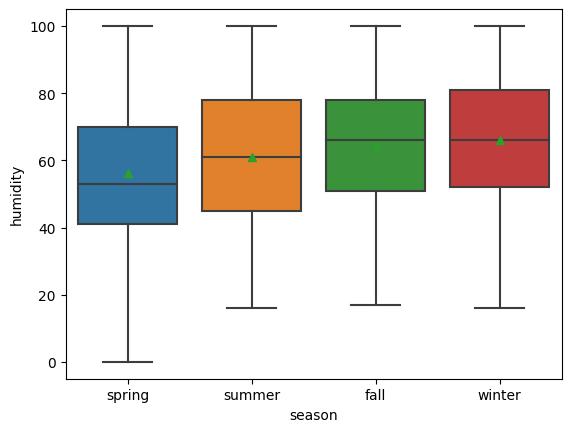

In [39]:
sns.boxplot(data = df, x = 'season', y = 'humidity', showmeans = True)
plt.show()

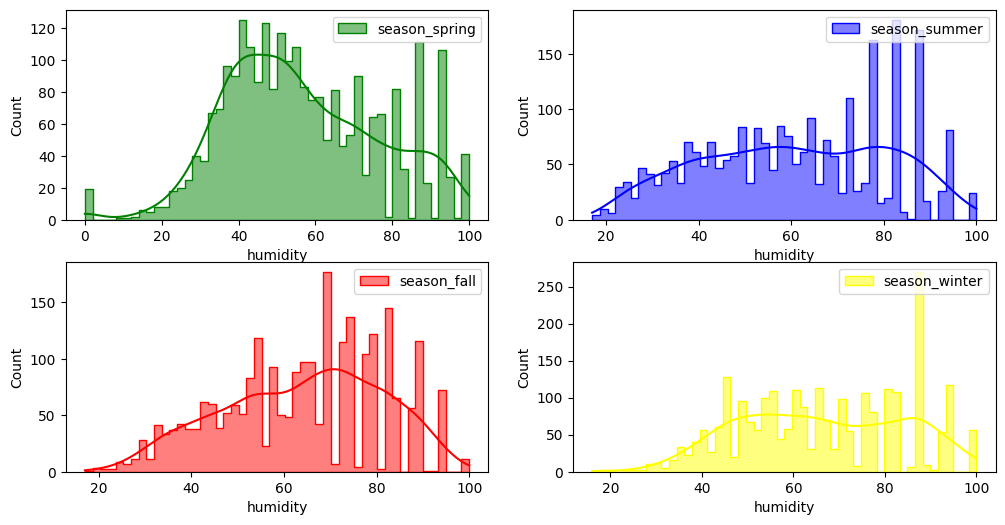

In [40]:
plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.histplot(spring_h.sample(2500) , bins = 50,
             element = 'step', color = 'green', kde = True, label = 'season_spring')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(summer_h.sample(2500), bins = 50,
             element = 'step', color = 'blue', kde = True, label = 'season_summer')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(fall_h.sample(2500), bins = 50,
             element = 'step', color = 'red', kde = True, label = 'season_fall')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(winter_h.sample(2500), bins = 50,
             element = 'step', color = 'yellow', kde = True, label = 'season_winter')
plt.legend()
plt.show()

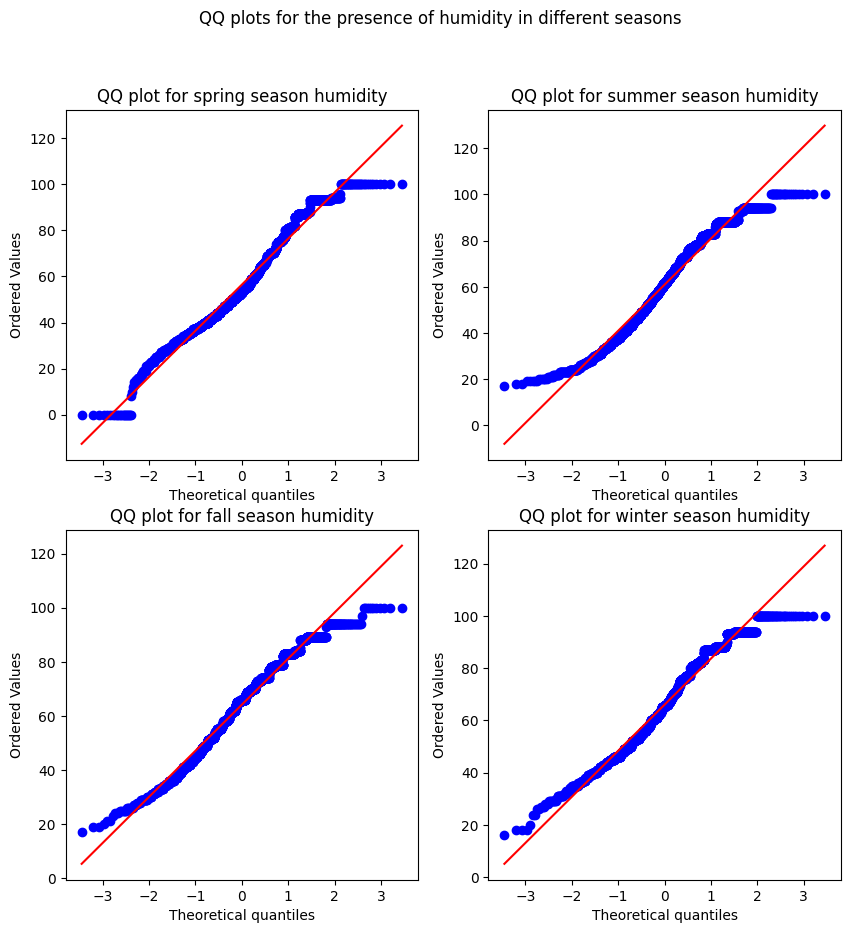

In [41]:
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.suptitle('QQ plots for the presence of humidity in different seasons')
spy.probplot(spring_h.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for spring season humidity')

plt.subplot(2, 2, 2)
spy.probplot(summer_h.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for summer season humidity')

plt.subplot(2, 2, 3)
spy.probplot(fall_h.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for fall season humidity')

plt.subplot(2, 2, 4)
spy.probplot(winter_h.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for winter season humidity')
plt.show()

### **The results:-**
 - Box plot shows there is difference between the different categories but we need to check the normalcy of the data and the proving the difference significant.
 - Histogram shows data is not following bell curve, the distribution are not normally distributed.
 - QQ plot evidently proves that the data is not normally distributed, the quantiles on both axis are not aligned.

### **Homogeneity of Variances using Levene's test**
 - Null Hypothesis(H0) - Homogenous Variance

 - Alternate Hypothesis(HA) - Non Homogenous Variance

In [42]:
test_stat, p_value = spy.levene(spring_h.sample(2500),summer_h.sample(2500),fall_h.sample(2500),winter_h.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have homogenous Variance')
else:
    print('The samples have homogenous Variance ')

p-value 2.0885217784567224e-24
The samples do not have homogenous Variance


### **Homogeneity of Distribution using KStest**
 - Null Hypothesis(H0) - Distributions are same.

 - Alternate Hypothesis(HA) - Distributions are different

In [43]:
spy.kstest(spring_h.sample(2500),summer_h.sample(2500),fall_h.sample(2500),winter_h.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are different')
else:
    print('The samples are same')

p-value 2.0885217784567224e-24
The samples are different


### **Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.**

In [44]:
test_stat, p_value = spy.kruskal(spring_h.sample(2500),summer_h.sample(2500),fall_h.sample(2500),winter_h.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Null hypothesis & Mean of humidity is different for different season')
else:
    print('Fail to reject the Null hypothesis & Mean of humidity is same for different season')

p-value 9.729313412711304e-81
Reject Null hypothesis & Mean of humidity is different for different season


# **Statistical test : Checking relation between categorical variable and numerical variable 'season' and 'windspeed'.**


## **Setting up Null and Alternate hypothesis**
### **- Null Hypothesis ( H0 ) - Mean of windspeed is same for different season**
### **- Alternate Hypothesis ( HA ) - Mean of windspeed is different for different season**

In [45]:
spring_ws= df.loc[df["season"]=="spring"]["windspeed"]
summer_ws= df.loc[df["season"]=="summer"]["windspeed"]
fall_ws= df.loc[df["season"]=="fall"]["windspeed"]
winter_ws= df.loc[df["season"]=="winter"]["windspeed"]

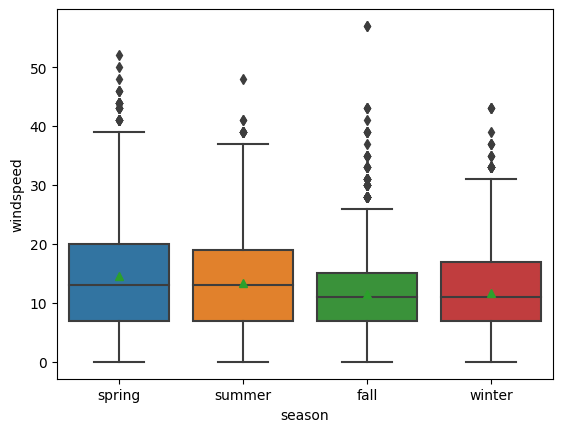

In [46]:
sns.boxplot(data = df, x = 'season', y = 'windspeed', showmeans = True)
plt.show()

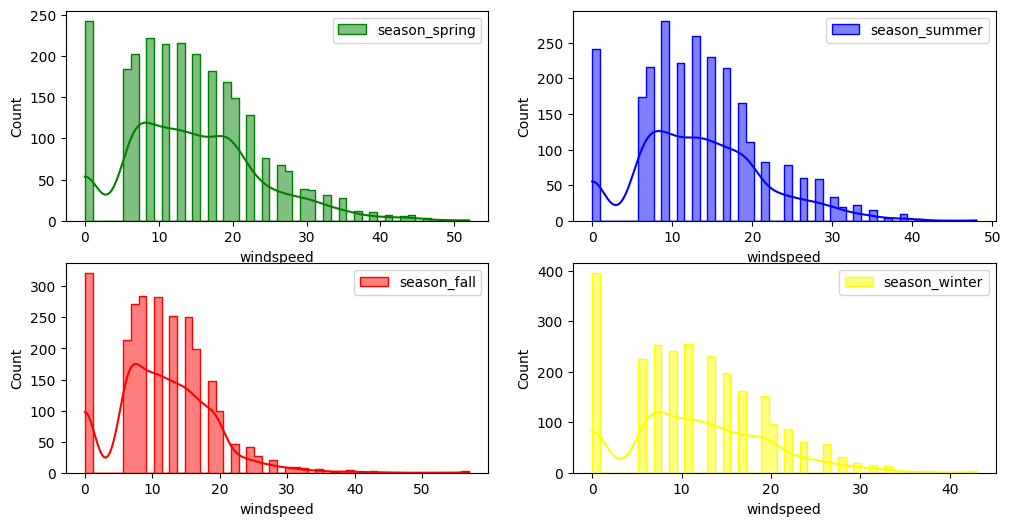

In [47]:
plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.histplot(spring_ws.sample(2500) , bins = 50,
             element = 'step', color = 'green', kde = True, label = 'season_spring')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(summer_ws.sample(2500), bins = 50,
             element = 'step', color = 'blue', kde = True, label = 'season_summer')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(fall_ws.sample(2500), bins = 50,
             element = 'step', color = 'red', kde = True, label = 'season_fall')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(winter_ws.sample(2500), bins = 50,
             element = 'step', color = 'yellow', kde = True, label = 'season_winter')
plt.legend()
plt.show()

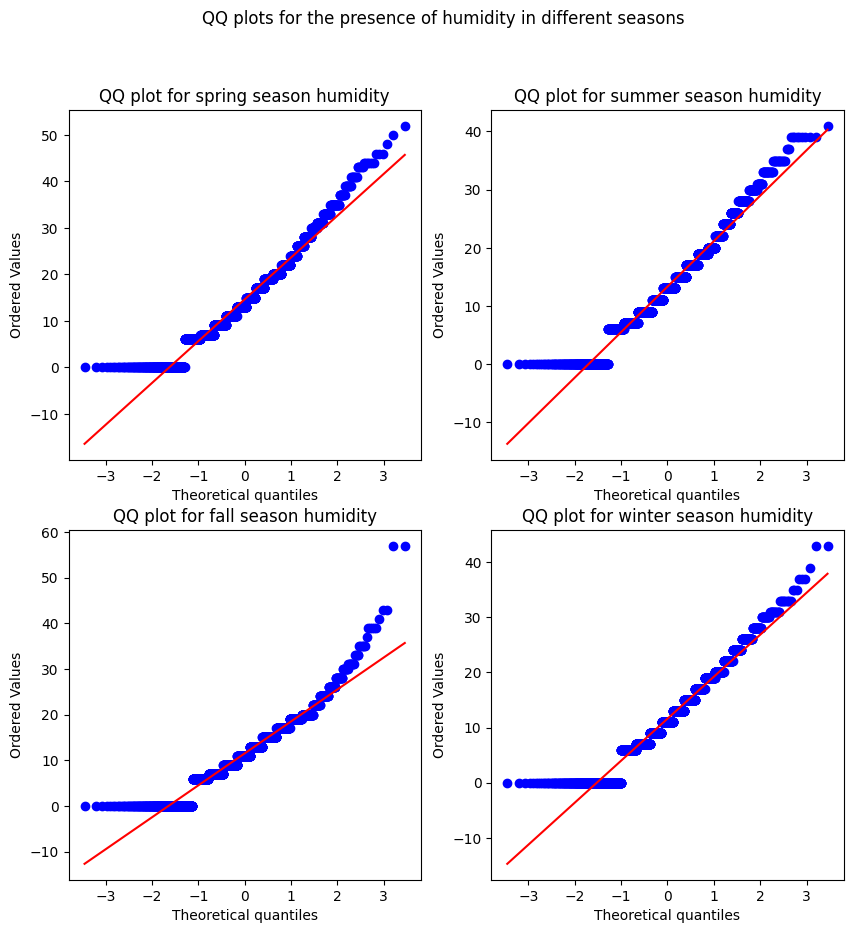

In [48]:
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.suptitle('QQ plots for the presence of humidity in different seasons')
spy.probplot(spring_ws.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for spring season humidity')

plt.subplot(2, 2, 2)
spy.probplot(summer_ws.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for summer season humidity')

plt.subplot(2, 2, 3)
spy.probplot(fall_ws.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for fall season humidity')

plt.subplot(2, 2, 4)
spy.probplot(winter_ws.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for winter season humidity')
plt.show()

### **The results:-**
 - Box plot shows there is difference between the different categories but we need to check the normalcy of the data and the proving the difference significant.
 - Histogram shows data is not following bell curve, the distribution are not normally distributed.
 - QQ plot evidently proves that the data is not normally distributed, the quantiles on both axis are not aligned.

### **Homogeneity of Variances using Levene's test**
 - Null Hypothesis(H0) - Homogenous Variance

 - Alternate Hypothesis(HA) - Non Homogenous Variance

In [49]:
test_stat, p_value = spy.levene(spring_ws.sample(2500),summer_ws.sample(2500),fall_ws.sample(2500),winter_ws.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have homogenous Variance')
else:
    print('The samples have homogenous Variance ')

p-value 1.6567321242152067e-28
The samples do not have homogenous Variance


### **Homogeneity of Distribution using KStest**
 - Null Hypothesis(H0) - Distributions are same.

 - Alternate Hypothesis(HA) - Distributions are different

In [50]:
spy.kstest(spring_ws.sample(2500),summer_ws.sample(2500),fall_ws.sample(2500),winter_ws.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are different')
else:
    print('The samples are same')

p-value 1.6567321242152067e-28
The samples are different


### **Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.**

In [51]:
test_stat, p_value =spy.kruskal(spring_ws.sample(2500),summer_ws.sample(2500),fall_ws.sample(2500),winter_ws.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Null hypothesis & Mean of windspeed is different for different season')
else:
    print('Fail to reject the Null hypothesis & Mean of windspeed is same for different season')

p-value 6.855397350464253e-42
Reject Null hypothesis & Mean of windspeed is different for different season


# **FEATURE : HOLIDAY**

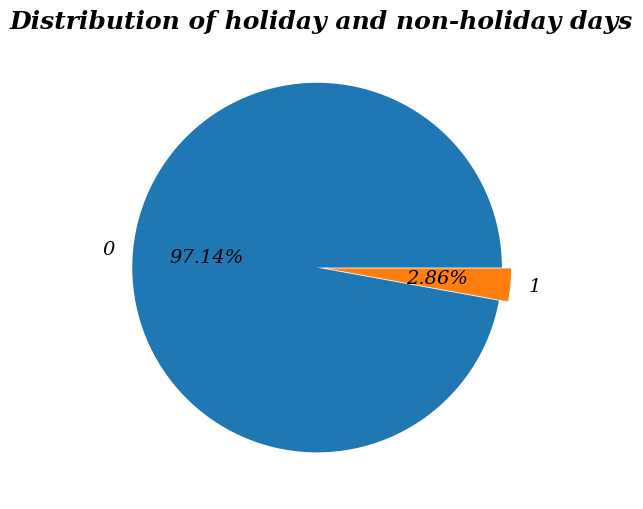

In [52]:
plt.figure(figsize=(6,6))
plt.title('Distribution of holiday and non-holiday days', fontdict={'fontsize' : 18,'fontweight' : 600,'fontstyle' : 'oblique','fontfamily' : 'serif'})
df_season=np.round(df['holiday'].value_counts(normalize=True)*100,2).to_frame()
plt.pie(x = df_season['holiday'], explode = [0.025, 0.025], labels = df_season.index, autopct = '%.2f%%',
        textprops = {'fontsize' : 14,'fontstyle' : 'oblique','fontfamily' : 'serif','fontweight' : 500})
plt.show()

# **Statistical test : Checking Dependancy between two categorical variables 'holiday' and 'workingday'.**


## **Setting up Null and Alternate hypothesis**
### **- Null Hypothesis ( H0 ) - holiday is independent of workinday.**
### **- Alternate Hypothesis ( HA ) - holiday is dependent of workingday.**

In [53]:
holiday_wd=pd.crosstab(df['holiday'],df['workingday'], values=df['count'], aggfunc=np.sum)
holiday_wd

workingday,0,1
holiday,,
0,597064,1430604
1,57808,0


Based of p_value we will reject or fail to reject the Null hypothesis

 - p-val > alpha : Fail to reject H0
 - p-val < alpha : Reject H0

Alpha in this case is 0.05.

In [54]:
chi_test_stat, p_value, dof, expected = chi2_contingency(holiday_wd)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('dof =', dof)
print('-' * 65)
print("Expected : '\n'", expected)
alpha = 0.05
if p_value <alpha :
 print("Interpretation : Reject Ho which states workingday is dependant on holiday")
else:
 print("Interpretation : Fail to Reject Ho which states workingday is independant of holiday")

Test Statistic = 129881.81665488513
p value = 0.0
dof = 1
-----------------------------------------------------------------
Expected : '
' [[ 636719.38612384 1390948.61387616]
 [  18152.61387616   39655.38612384]]
Interpretation : Reject Ho which states workingday is dependant on holiday


# **Statistical test : Checking Dependancy between two categorical variables 'holiday' and 'weather'.**


## **Setting up Null and Alternate hypothesis**
### **- Null Hypothesis ( H0 ) - holiday is independent of weather.**
### **- Alternate Hypothesis ( HA ) - holiday is dependent of weather.**

In [55]:
holiday_wd=pd.crosstab(df['holiday'],df['weather'], values=df['count'], aggfunc=np.sum)
holiday_wd

weather,1,2,3,4
holiday,,,,
0,1438646,488599,100259,164
1,37417,18561,1830,0


Based of p_value we will reject or fail to reject the Null hypothesis

 - p-val > alpha : Fail to reject H0
 - p-val < alpha : Reject H0

Alpha in this case is 0.05.

In [56]:
chi_test_stat, p_value, dof, expected = chi2_contingency(holiday_wd)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('dof =', dof)
print('-' * 65)
print("Expected : '\n'", expected)
alpha = 0.05
if p_value <alpha :
 print("Interpretation : Reject Ho which states weather is dependant on holiday")
else:
 print("Interpretation : Fail to Reject Ho which states weather is independant of holiday")

Test Statistic = 2159.0758831620306
p value = 0.0
dof = 3
-----------------------------------------------------------------
Expected : '
' [[1.43514752e+06 4.93101864e+05 9.92591612e+04 1.59454030e+02]
 [4.09154792e+04 1.40581360e+04 2.82983881e+03 4.54597032e+00]]
Interpretation : Reject Ho which states weather is dependant on holiday


# **Is the number of cycles rented is similar or different on holiday or non-holiday days ?**


# **Statistical test : Checking relation between categorical variable and numerical variable 'holiday' and 'count'.**


## **Setting up Null and Alternate hypothesis**
### **Null Hypothesis ( H0 ) - Holidays have no effect on the number of electric vehicles rented**

### **Alternate Hypothesis ( HA ) - Holidays has some effect on the number of electric vehicles rented**

In [57]:
holiday= df.loc[df["holiday"]==1]["count"]
No_holiday= df.loc[df["holiday"]==0]["count"]

In [58]:
df.groupby(by = 'holiday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


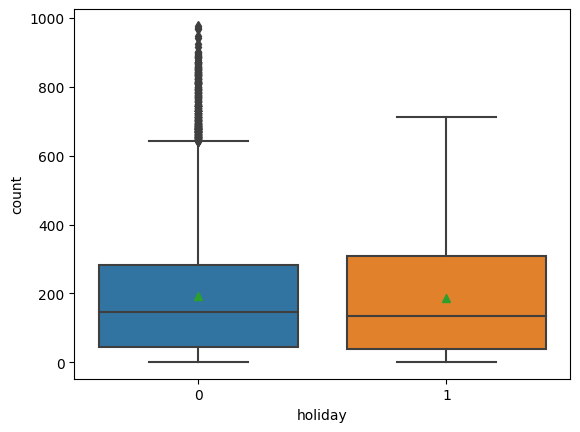

In [59]:
sns.boxplot(data = df, x = 'holiday', y = 'count', showmeans = True)
plt.show()

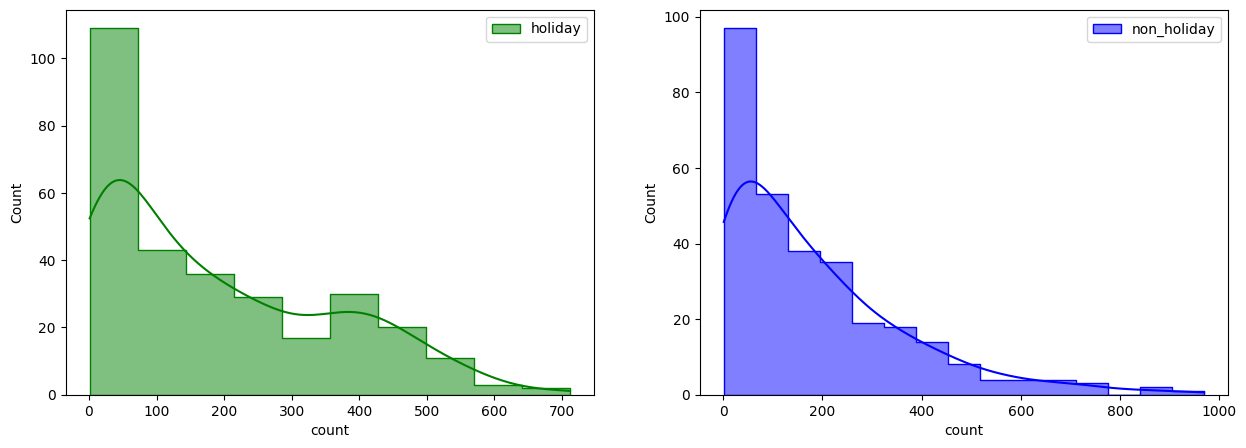

In [60]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(holiday.sample(300),
             element = 'step', color = 'green', kde = True, label = 'holiday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(No_holiday.sample(300),
             element = 'step', color = 'blue', kde = True, label = 'non_holiday')
plt.legend()
plt.show()

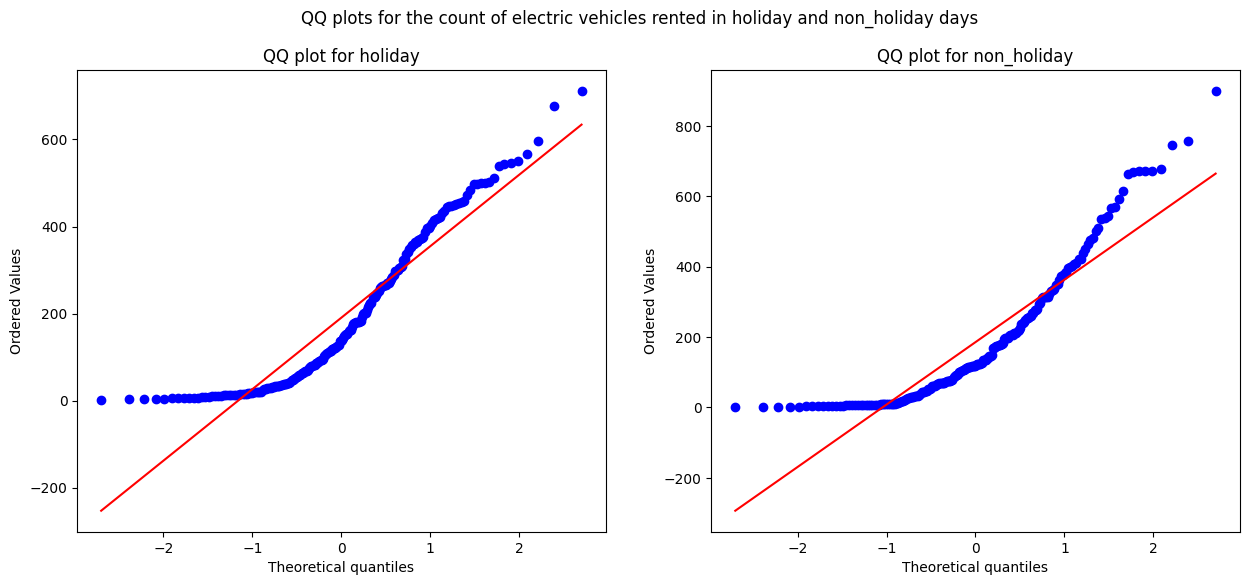

In [61]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in holiday and non_holiday days')
spy.probplot(holiday.sample(200), plot = plt, dist = 'norm')
plt.title('QQ plot for holiday')
plt.subplot(1, 2, 2)
spy.probplot(No_holiday.sample(200), plot = plt, dist = 'norm')
plt.title('QQ plot for non_holiday')
plt.show()

### **Homogeneity of Variances using Levene's test**
- Null Hypothesis(H0) - Homogenous Variance

- Alternate Hypothesis(HA) - Non Homogenous Variance



In [62]:
test_stat, p_value = spy.levene(holiday.sample(300),No_holiday.sample(300))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.15993329418373417
The samples have Homogenous Variance 


### **Homogeneity of distribution using KStest**
- Null Hypothesis(H0) - Distribution are same

- Alternate Hypothesis(HA) - Distribution are different

In [63]:
spy.kstest(holiday.sample(300), No_holiday.sample(300))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are different')
else:
    print('The samples are same')

p-value 0.15993329418373417
The samples are same


### **Seeing the above sceanrio, it seems that graphical analysis shows that data is not normally distributed but on the other hand, while performing levene and KStest, its shows that the homogenity of the distribution and variances are same. hence, we can proceed with the ttest_ind.**

In [64]:
test_stat, p_value = spy.ttest_ind(holiday.sample(300), No_holiday.sample(300))
print('P-value :',p_value)
if p_value < 0.05:
    print('Reject H0 which states No.of electric cycles rented is not similar for holidays and non-holidays days')
else:
    print('Fail to Reject H0  which states that No.of electric cycles rented is similar for holidays and non-holidays')

P-value : 0.716088555404288
Fail to Reject H0  which states that No.of electric cycles rented is similar for holidays and non-holidays


# **FEATURE : 'workingday'**

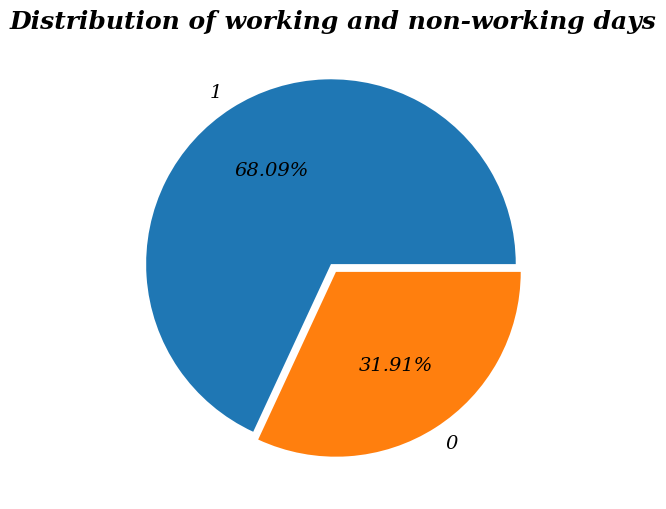

In [65]:
plt.figure(figsize=(6,6))
plt.title('Distribution of working and non-working days', fontdict={'fontsize' : 18,'fontweight' : 600,'fontstyle' : 'oblique','fontfamily' : 'serif'})
df_season=np.round(df['workingday'].value_counts(normalize=True)*100,2).to_frame()
plt.pie(x = df_season['workingday'], explode = [0.025, 0.025], labels = df_season.index, autopct = '%.2f%%',
        textprops = {'fontsize' : 14,'fontstyle' : 'oblique','fontfamily' : 'serif','fontweight' : 500})
plt.show()

# **Statistical test : Checking Dependancy between two categorical variables 'workingday' and 'weather'.**


## **Setting up Null and Alternate hypothesis**
### **- Null Hypothesis ( H0 ) - workingday is independent of weather.**
### **- Alternate Hypothesis ( HA ) - workingday is dependent of weather.**

In [66]:
wd_weather = pd.crosstab(df['workingday'],df['weather'],values=df['count'],aggfunc=np.sum)
wd_weather

weather,1,2,3,4
workingday,,,,
0,478473,149377,27022,0
1,997590,357783,75067,164


In [67]:
chi_test_stat, p_value, dof, expected = chi2_contingency(wd_weather)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('dof =', dof)
print('-' * 65)
print("Expected : '\n'", expected)
alpha = 0.05
if p_value <alpha :
 print("Interpretation : Reject Ho which states weather is dependant on workingday")
else:
 print("Interpretation : Fail to Reject Ho which states weather is independant of workingday")

Test Statistic = 2825.938809352849
p value = 0.0
dof = 3
-----------------------------------------------------------------
Expected : '
' [[4.63506810e+05 1.59256152e+05 3.20575387e+04 5.14985586e+01]
 [1.01255619e+06 3.47903848e+05 7.00314613e+04 1.12501441e+02]]
Interpretation : Reject Ho which states weather is dependant on workingday


# **Working Day has effect on number of electric cycles rented ?**


# **Statistical test : Checking relation between categorical variable and numerical variable 'workingday' and 'count'.**


## **Setting up Null and Alternate hypothesis**
### **Null Hypothesis ( H0 ) - Workingday has no effect on the number of electric vehicles rented**

### **Alternate Hypothesis ( HA ) - Workingday has some effect on the number of electric vehicles rented**

In [68]:
working= df.loc[df["workingday"]==1]["count"]
No_working= df.loc[df["workingday"]==0]["count"]

In [69]:
df.groupby(['workingday'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


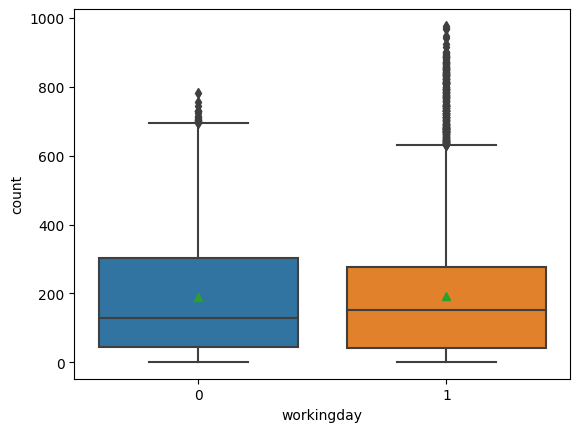

In [70]:
sns.boxplot(data = df, x = 'workingday', y = 'count', showmeans = True)
plt.show()

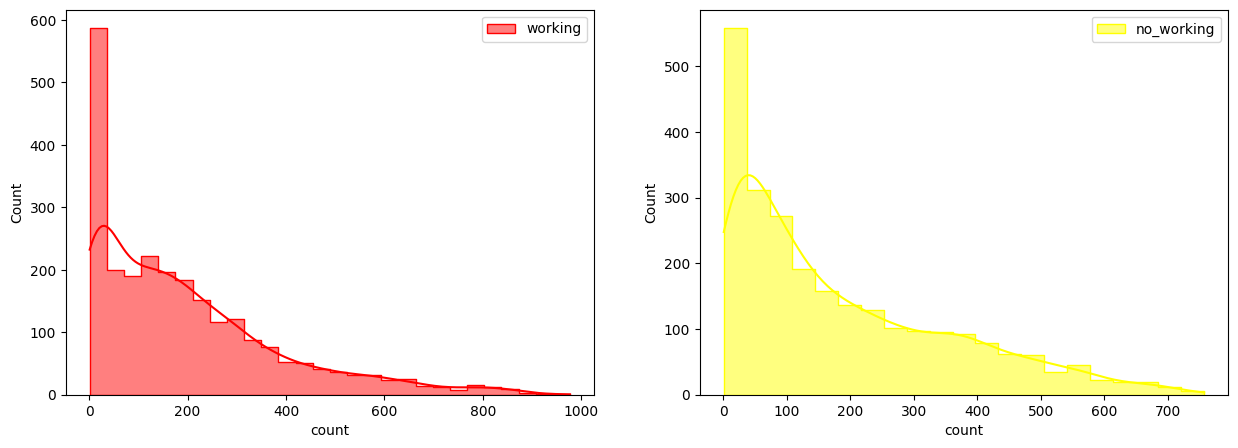

In [71]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(working.sample(2500), element = 'step', color = 'red', kde = True, label = 'working')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(No_working.sample(2500), element = 'step', color = 'yellow', kde = True, label = 'no_working')
plt.legend()
plt.show()

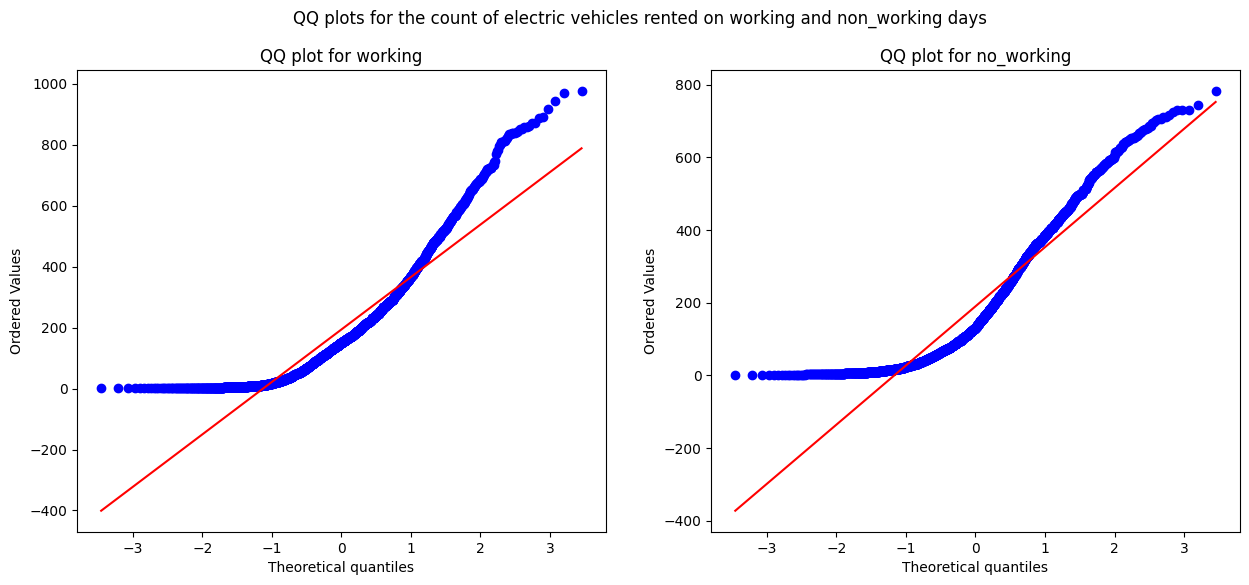

In [72]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented on working and non_working days')
spy.probplot(working.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for working')
plt.subplot(1, 2, 2)
spy.probplot(No_working.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for no_working')
plt.show()

### **Homogeneity of Variances using Levene's test**
- Null Hypothesis(H0) - Homogenous Variance

- Alternate Hypothesis(HA) - Non Homogenous Variance

In [73]:
test_stat, p_value = spy.levene(working.sample(2500),No_working.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.873277800794396
The samples have Homogenous Variance 


### **Homogeneity of distribution using KStest**
- Null Hypothesis(H0) - Distribution are same

- Alternate Hypothesis(HA) - Distribution are different

In [74]:
spy.kstest(working.sample(2500), No_working.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are different')
else:
    print('The samples are same')

p-value 0.873277800794396
The samples are same


### **Seeing the above sceanrio, it seems that graphical analysis shows that data is not normally distributed but on the other hand, while performing levene and KStest, its shows that the homogenity of the distribution and variances are same. hence, we can proceed with the ttest_ind.**

In [75]:
test_stat, p_value = spy.ttest_ind(working.sample(2500), No_working.sample(2500))
print('P-value :',p_value)
if p_value < 0.05:
    print('Reject H0 which states No.of electric cycles rented is not similar for working and non-working days')
else:
    print('Fail to Reject H0  which states that No.of electric cycles rented is similar for working and non-working days')

P-value : 0.7783242594473684
Fail to Reject H0  which states that No.of electric cycles rented is similar for working and non-working days


# **FEATURE : 'weather'**

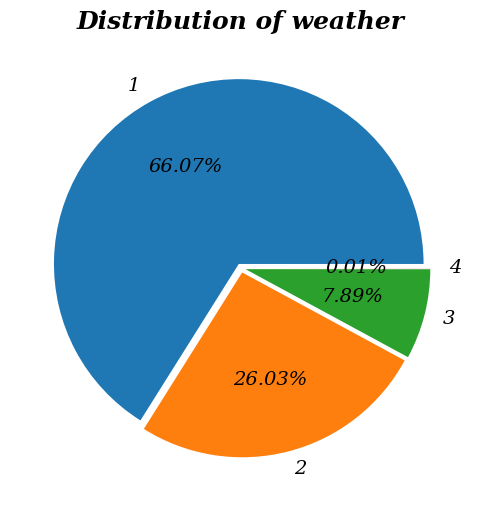

In [76]:
plt.figure(figsize=(6,6))
plt.title('Distribution of weather', fontdict={'fontsize' : 18,'fontweight' : 600,'fontstyle' : 'oblique','fontfamily' : 'serif'})
df_season=np.round(df['weather'].value_counts(normalize=True)*100,2).to_frame()
plt.pie(x = df_season['weather'], explode = [0.025, 0.025, 0.025, 0.025], labels = df_season.index, autopct = '%.2f%%',
        textprops = {'fontsize' : 14,'fontstyle' : 'oblique','fontfamily' : 'serif','fontweight' : 500})
plt.show()

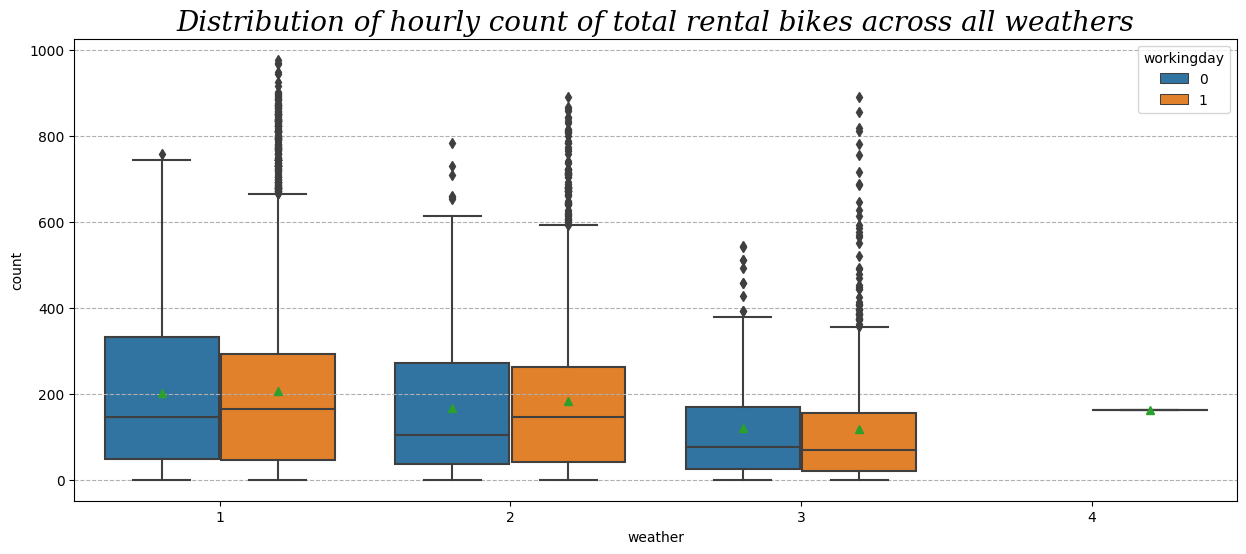

In [77]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all weathers',
         fontdict = {'size' : 20,
                    'style' : 'oblique',
                    'family' : 'serif'})
sns.boxplot(data = df, x = 'weather', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.show()


# **No. of cycles rented similar or different in different weather ?**


# **Statistical test : Checking relation between categorical variable and numerical variable 'weather' and 'count'.**


## **Setting up Null and Alternate hypothesis**
### **Null Hypothesis ( H0 ) - Weather has no effect on the number of electric vehicles rented**

### **Alternate Hypothesis ( HA ) - Weather has some effect on the number of electric vehicles rented**

In [78]:
clear= df.loc[df['weather']==1]['count']
mist= df.loc[df['weather']==2]['count']
light_snow= df.loc[df['weather']==3]['count']
heavy_rain= df.loc[df['weather']==4]['count']

In [79]:
df.groupby(['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


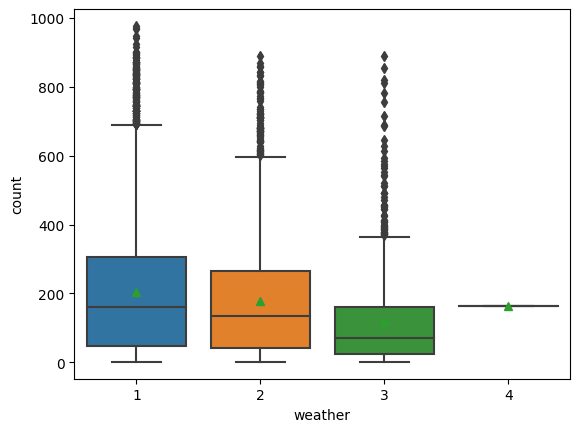

In [80]:
sns.boxplot( df, x='weather', y='count', showmeans= True)
plt.show()

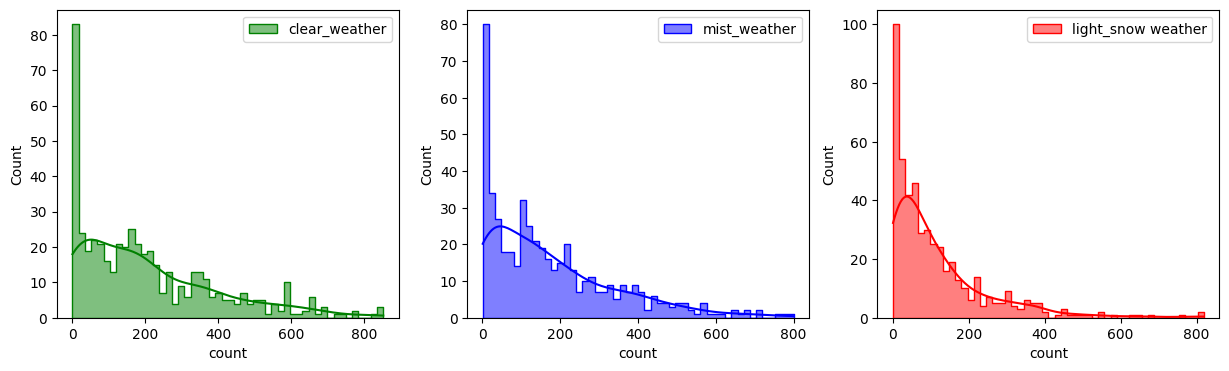

In [81]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 3, 1)
sns.histplot(clear.sample(500) , bins = 50,
             element = 'step', color = 'green', kde = True, label = 'clear_weather')
plt.legend()
plt.subplot(1, 3, 2)
sns.histplot(mist.sample(500), bins = 50,
             element = 'step', color = 'blue', kde = True, label = 'mist_weather')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(light_snow.sample(500), bins = 50,
             element = 'step', color = 'red', kde = True, label = 'light_snow weather')
plt.legend()
plt.show()

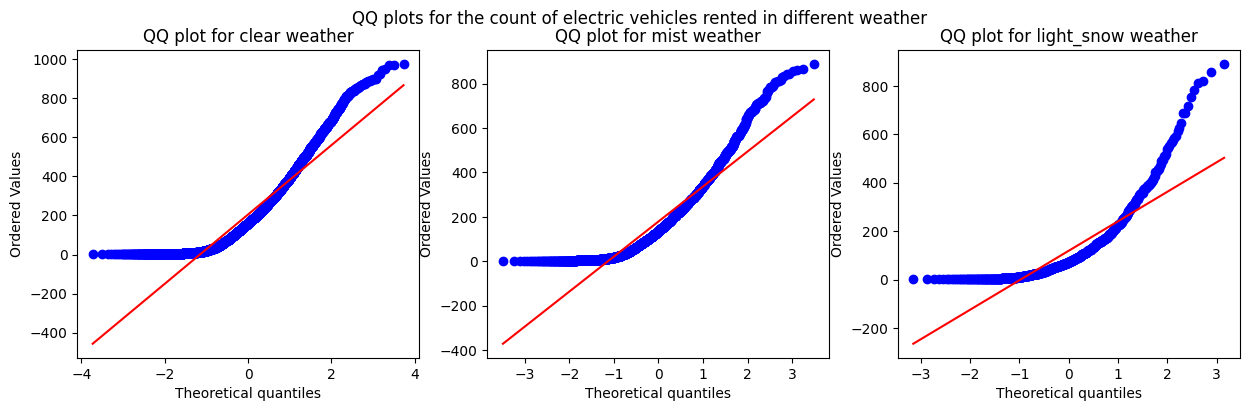

In [82]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 3, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different weather')
spy.probplot(clear, plot = plt, dist = 'norm')
plt.title('QQ plot for clear weather')

plt.subplot(1, 3, 2)
spy.probplot(mist, plot = plt, dist = 'norm')
plt.title('QQ plot for mist weather')

plt.subplot(1, 3, 3)
spy.probplot(light_snow, plot = plt, dist = 'norm')
plt.title('QQ plot for light_snow weather')
plt.show()

### **Homogeneity of Variances using Levene's test**
- Null Hypothesis(H0) - Homogenous Variance

- Alternate Hypothesis(HA) - Non Homogenous Variance

In [83]:
test_stat, p_value = spy.levene(clear.sample(500),mist.sample(500),light_snow.sample(500),heavy_rain)
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 6.114614214338303e-19
The samples do not have  Homogenous Variance


### **Homogeneity of distribution using KStest**
- Null Hypothesis(H0) - Distribution are same

- Alternate Hypothesis(HA) - Distribution are different

In [84]:
spy.kstest(clear.sample(500),mist.sample(500),light_snow.sample(500),heavy_rain)
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are different')
else:
    print('The samples are same')

p-value 6.114614214338303e-19
The samples are different


### **Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.**

In [85]:
test_stat, p_value = spy.kruskal(clear.sample(500),mist.sample(500),light_snow.sample(500),heavy_rain)
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Null hypothesis which states mean no. of cycles rented is different for different weather')
else:
    print('Fail to reject the Null hypothesis which states mean no. of cycles rented is same for different weather')

p-value 8.092856614300421e-17
Reject Null hypothesis which states mean no. of cycles rented is different for different weather


# **FEATURE - 'temp' & 'atemp'**

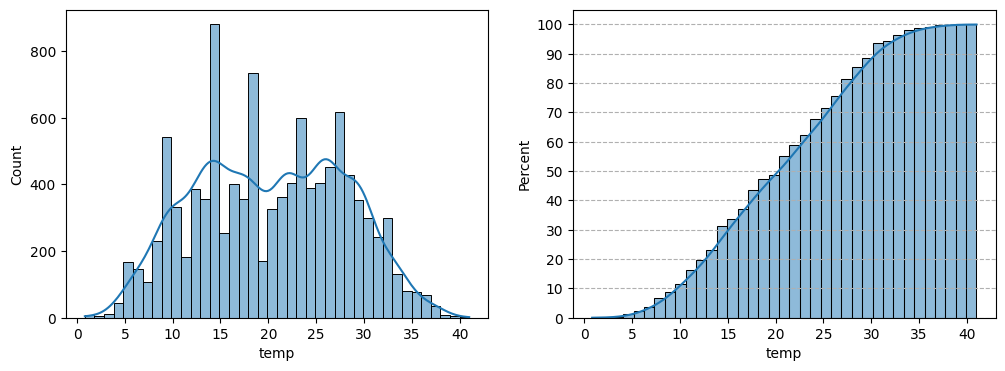

In [86]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data = df, x = 'temp', kde = True, bins = 40)
plt.subplot(1,2,2)
sns.histplot(data = df, x = 'temp', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.show()

 -  More than 80 % of the time, the temperature is less than 28 degrees celcius.


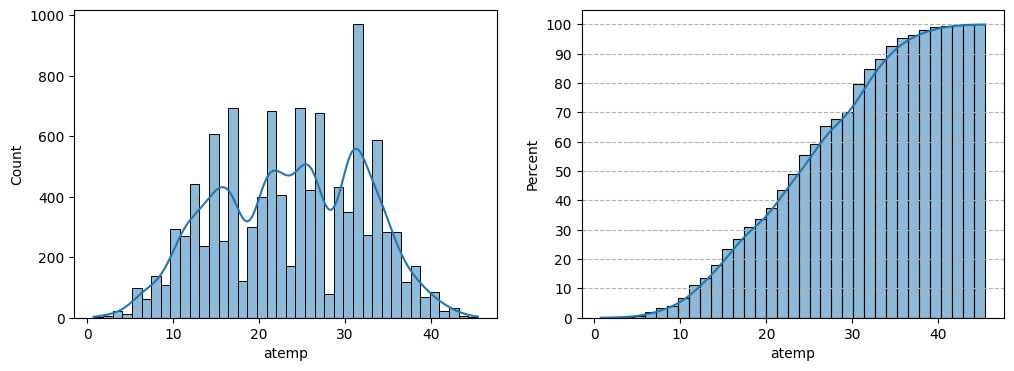

In [87]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data = df, x = 'atemp', kde = True, bins = 40)
plt.subplot(1,2,2)
sns.histplot(data = df, x = 'atemp', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.show()

## **Outlier Detection for 'temp' and 'atemp'**

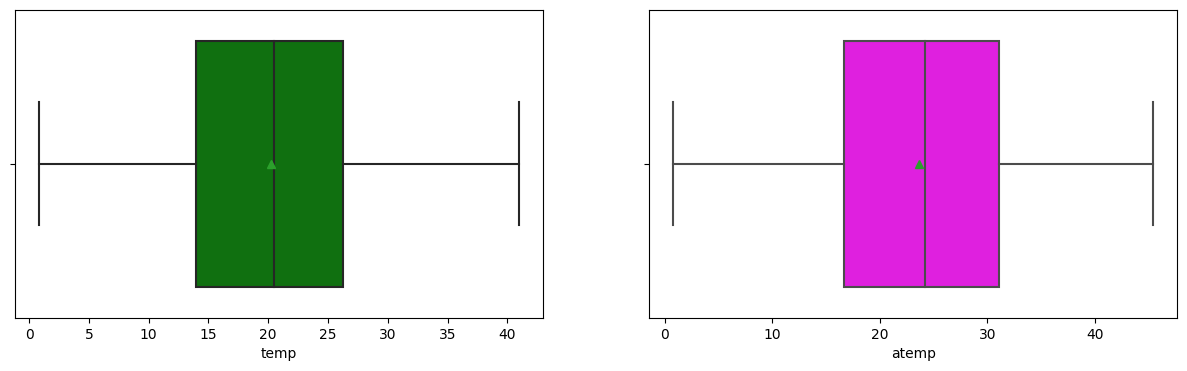

In [88]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(data = df, x = df['temp'], color='green', showmeans = True, fliersize = 2)
plt.subplot(1,2,2)
sns.boxplot(data = df, x = df['atemp'], color ='magenta', showmeans = True, fliersize = 2)
plt.show()

# **Statistical test : Checking correlation between 'temp' and 'atemp'.**


## **Setting up Null and Alternate hypothesis**
### **Null Hypothesis ( H0 ) - Not correlated**

### **Alternate Hypothesis ( HA ) - Correlated**
**Alpha is 0.5**

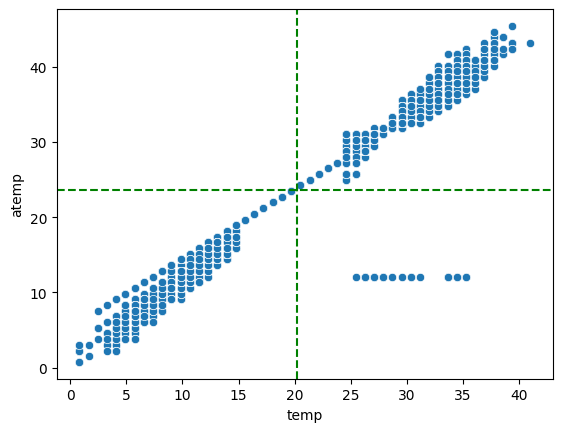

In [89]:
sns.scatterplot(x=df['temp'], y=df['atemp'])
plt.axvline(df['temp'].mean(),color="green",linestyle="--")
plt.axhline(df['atemp'].mean(),color="green",linestyle="--")
plt.show()

In [90]:
np.corrcoef(df['temp'],df['atemp'])

array([[1.        , 0.98494811],
       [0.98494811, 1.        ]])

In [91]:
t_stat, p_value=spy.pearsonr(df['temp'],df['atemp'])
if p_value <0.5:
  print(p_value)
  print('Reject H0 which is states data is correlated')
else:
  print('fail to reject H0 which is states data is not correlated')

0.0
Reject H0 which is states data is correlated


In [92]:
temp_ranks=df['temp'].rank()
atemp_ranks=df['atemp'].rank()

In [93]:
t_stat, p_value =spy.spearmanr(temp_ranks,atemp_ranks)
if p_value <0.5:
  print(p_value)
  print('Reject H0 which is states data is correlated')
else:
  print('fail to reject H0 which is states data is not correlated')

0.0
Reject H0 which is states data is correlated


# **FEATURE - 'humidity' & 'windspeed'**

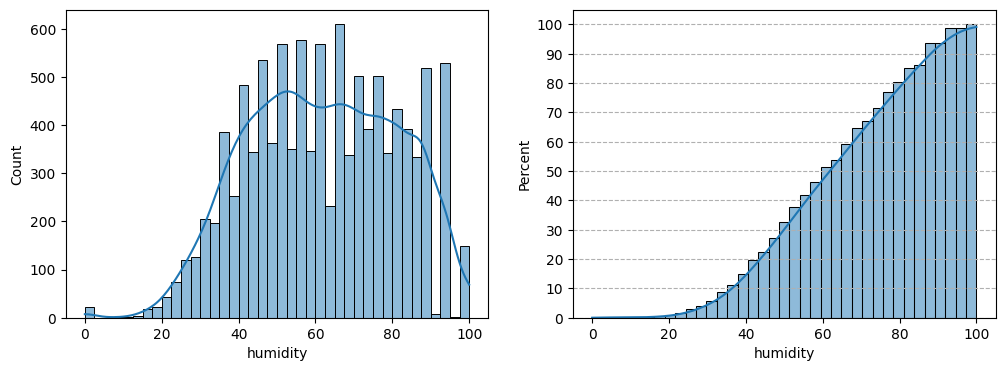

In [94]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data = df, x = 'humidity', kde = True, bins = 40)
plt.subplot(1,2,2)
sns.histplot(data = df, x = 'humidity', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.show()

 - More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.


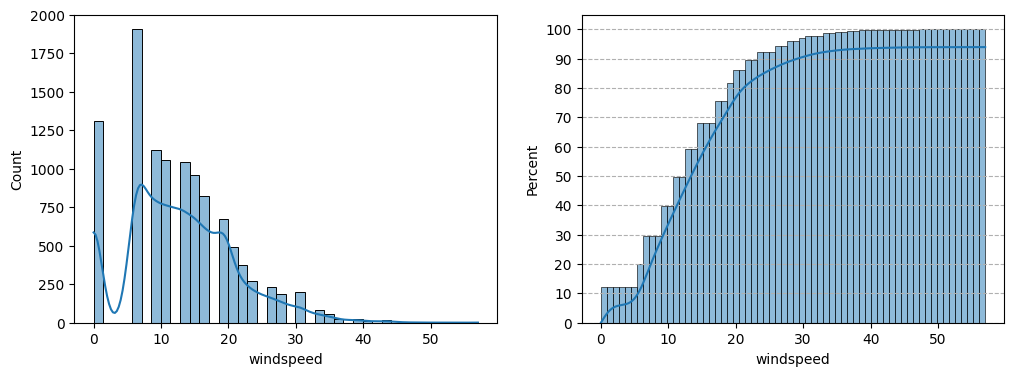

In [95]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data = df, x = 'windspeed', kde = True, bins = 40)
plt.subplot(1,2,2)
sns.histplot(data = df, x = 'windspeed', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.show()

 - More than 85 % of the total windspeed data has a value of less than 20.


## **Outlier detection for 'humidity' and 'windspeed'**

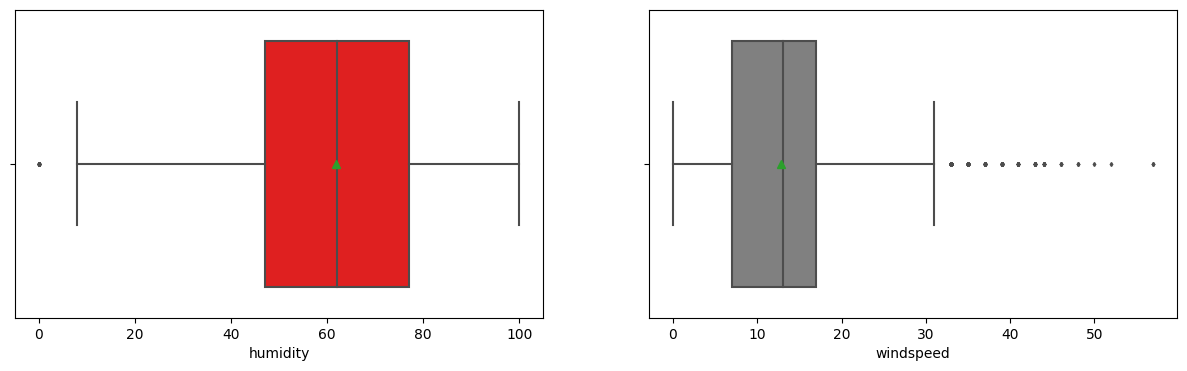

In [96]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(data = df, x = df['humidity'],color= 'red', showmeans = True, fliersize = 2)
plt.subplot(1,2,2)
sns.boxplot(data = df, x = df['windspeed'],color= 'gray', showmeans = True, fliersize = 2)
plt.show()

# **Statistical test : Checking correlation between 'humidity' and 'windspeed'.**


## **Setting up Null and Alternate hypothesis**
### **Null Hypothesis ( H0 ) - Not correlated**

### **Alternate Hypothesis ( HA ) - Correlated**
**Alpha is 0.5**

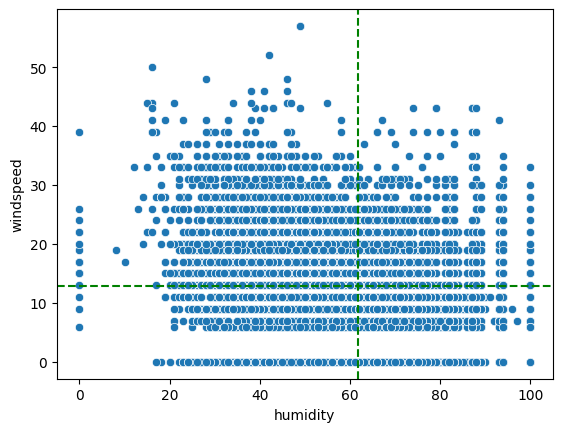

In [97]:
sns.scatterplot(x=df['humidity'], y=df['windspeed'])
plt.axvline(df['humidity'].mean(),color="green",linestyle="--")
plt.axhline(df['windspeed'].mean(),color="green",linestyle="--")
plt.show()

In [98]:
np.corrcoef(df['humidity'],df['windspeed'])

array([[ 1.        , -0.31860699],
       [-0.31860699,  1.        ]])

In [99]:
t_stat, p_value=spy.pearsonr(df['humidity'],df['windspeed'])
if p_value <0.5:
  print(p_value)
  print('Reject H0 which is states data is correlated')
else:
  print('fail to reject H0 which is states data is not correlated')

2.499949129667336e-255
Reject H0 which is states data is correlated


In [100]:
h_ranks=df['humidity'].rank()
ws_ranks=df['windspeed'].rank()

In [101]:
t_stat, p_value =spy.spearmanr(h_ranks,ws_ranks)
if p_value <0.5:
  print(p_value)
  print('Reject H0 which is states data is correlated')
else:
  print('fail to reject H0 which is states data is not correlated')

3.0980404677025436e-265
Reject H0 which is states data is correlated


## **Both 'humidity' and 'windspeed' are weakly negatively correlated.**

# **FEATURE - 'casual' & 'registered'**

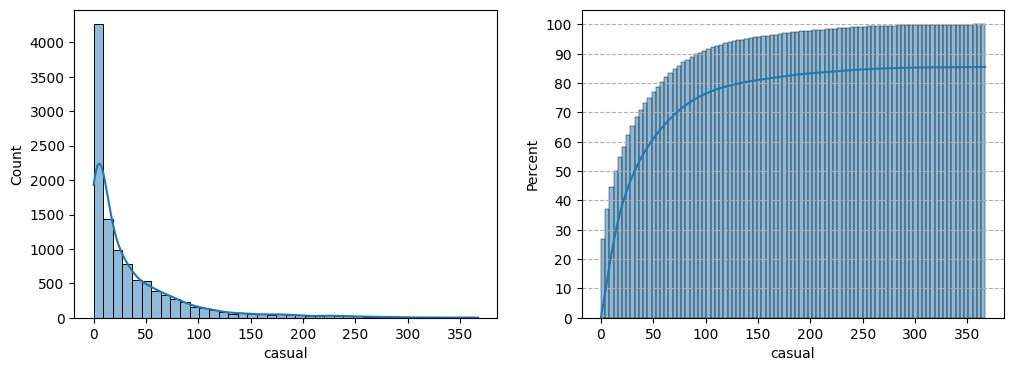

In [102]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data = df, x = 'casual', kde = True, bins = 40)
plt.subplot(1,2,2)
sns.histplot(data = df, x = 'casual', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.show()

 - More than 80 % of the time, the count of casual users is less than 60.


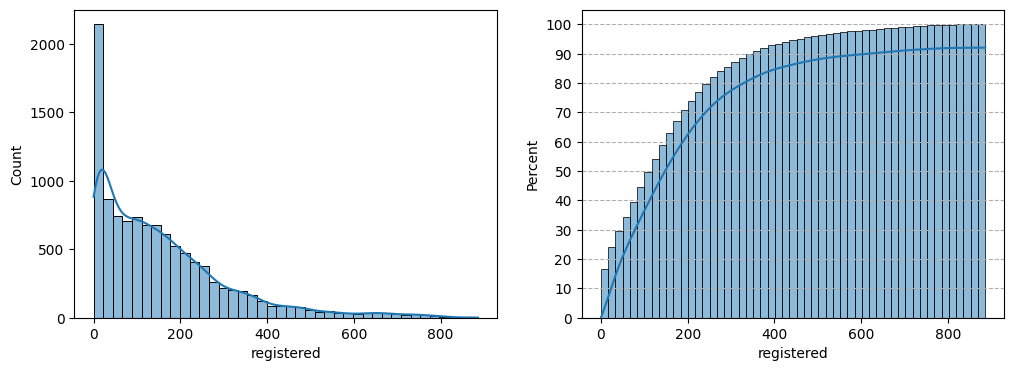

In [103]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data = df, x = 'registered', kde = True, bins = 40)
plt.subplot(1,2,2)
sns.histplot(data = df, x = 'registered', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.show()

 - More than 85 % of the time, the count of registered users is less than 300.


## **Outlier detection for 'casual' & 'registered'**

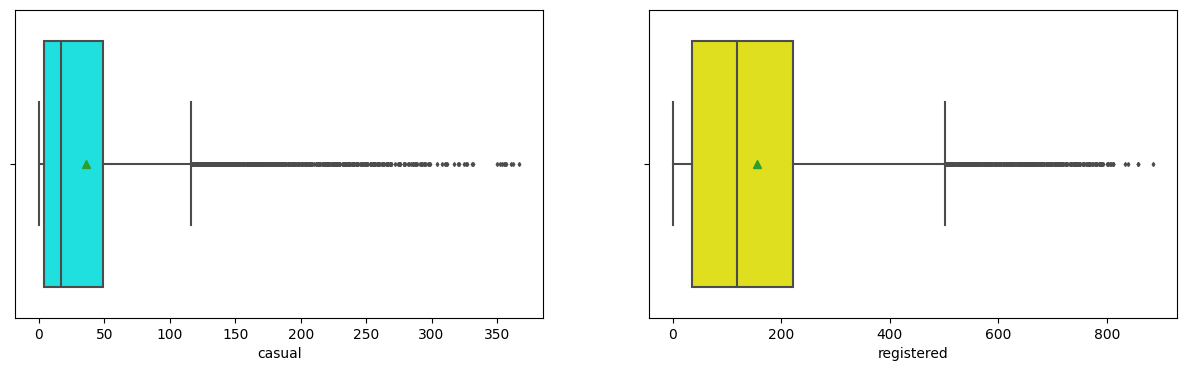

In [104]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(data = df, x = df['casual'],color= 'cyan', showmeans = True, fliersize = 2)
plt.subplot(1,2,2)
sns.boxplot(data = df, x = df['registered'],color= 'yellow', showmeans = True, fliersize = 2)
plt.show()

# **Statistical test : Checking correlation between 'casual' and 'registered' users.**


## **Setting up Null and Alternate hypothesis**
### **Null Hypothesis ( H0 ) - Not correlated**

### **Alternate Hypothesis ( HA ) - Correlated**
**Alpha is 0.5**

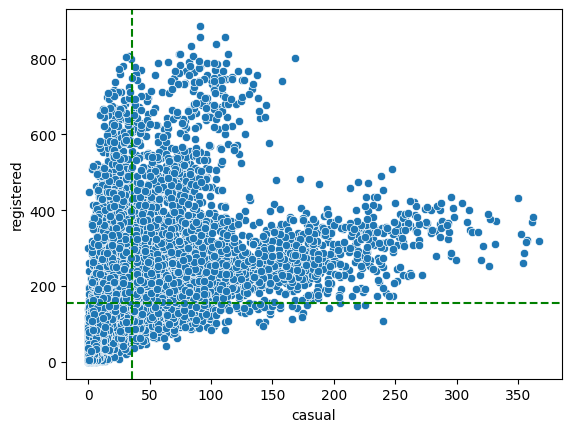

In [105]:
sns.scatterplot(x=df['casual'], y=df['registered'])
plt.axvline(df['casual'].mean(),color="green",linestyle="--")
plt.axhline(df['registered'].mean(),color="green",linestyle="--")
plt.show()

In [106]:
np.corrcoef(df['casual'],df['registered'])

array([[1.        , 0.49724969],
       [0.49724969, 1.        ]])

In [107]:
t_stat, p_value=spy.pearsonr(df['casual'],df['registered'])
if p_value <0.5:
  print(p_value)
  print('Reject H0 which is states data is correlated')
else:
  print('fail to reject H0 which is states data is not correlated')

0.0
Reject H0 which is states data is correlated


In [108]:
casual_ranks=df['casual'].rank()
reg_ranks=df['registered'].rank()

In [109]:
t_stat, p_value =spy.spearmanr(casual_ranks,reg_ranks)
if p_value <0.5:
  print(p_value)
  print('Reject H0 which is states data is correlated')
else:
  print('fail to reject H0 which is states data is not correlated')

0.0
Reject H0 which is states data is correlated


<ipython-input-110-7a737be9cbeb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = df.corr()


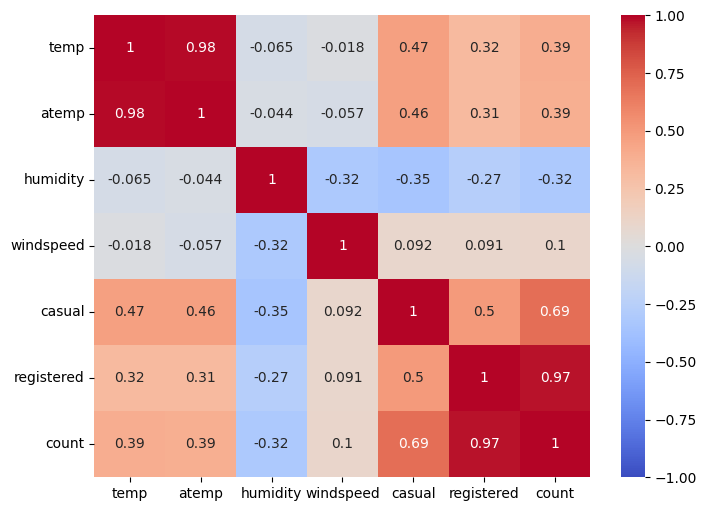

In [110]:
corr_data = df.corr()
plt.figure(figsize = (8, 6))
sns.heatmap(data = corr_data, cmap = 'coolwarm', annot = True, vmin = -1, vmax = 1)
plt.show()

 - Very High Correlation (> 0.9) exists between columns [atemp, temp] and [count, registered]
 - High positively / negatively correlation (0.7 - 0.9) does not exist between any columns.
 - Moderate positive correlation (0.5 - 0.7) exists between columns [casual, count], [casual, registered].
 - Low Positive correlation (0.3 - 0.5) exists between columns [count, temp], [count, atemp], [casual, atemp]
 - Negligible correlation exists between all other combinations of columns.

# **INSIGHTS**
 - The data is given from Timestamp('2011-01-01 00:00:00') to Timestamp('2012-12-19 23:00:00'). The total time period for which the data is given is '718 days 23:00:00'.
 - Out of every 100 users, around 19 are casual users and 81 are registered users.
 - The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.
 - There is a seasonal pattern in the count of rental bikes, with higher demand during the fall and summer months, a slight decline in the winter, and a further decrease in the spring months.
 - The average hourly count of rental bikes is the lowest in the month of January followed by February and March.
 - There is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.
 - More than 80 % of the time, the temperature is less than 28 degrees celcius.
 - More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.
 - More than 85 % of the total, windspeed data has a value of less than 20.
 - Season is dependant on weather - Statistically proven.
 - Season is dependant on workingday - Statistically proven.
 - Season is dependant on holiday - Statistically proven.
 - No. of cycles rented are different in different seasons - Statistically proven.
 - Mean of humidity is different in different seasons - Statistically proven.
 - Mean of windspeed is different in different seasons - Statistically proven.
 - Workingday is dependant on holiday - Statistically proven.
 - Weather is dependant on holiday - Statistically proven.
 - No. of cycles rented are similar on holiday or non- holiday days - Statistically proven.
 - Working day is dependant on weather - Statistically proven.
 - No. of cycles rented are similar on workingday or non- working days - Statistically proven.
 - No. of cycles rented are different in different weather - Statistically proven.
 - temp & atemp are highly correlated - Statistically proven.
 - humidity & windspeed are weakly negatively correlated - Statistically proven.
 - casual & registered users are positively correlated - Statistically proven.

# **RECOMMENDATIONS**

 - Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.

 - Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can encourage customers to rent bikes during less busy times, balancing out the demand and optimizing the resources.

 - Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.

 - Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.

 - Analyze the demand patterns during different months and adjust the inventory accordingly. During months with lower rental counts such as January, February, and March, Yulu can optimize its inventory levels to avoid excess bikes. On the other hand, during peak months, ensure having sufficient bikes available to meet the higher demand.

 - Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions or implementing safety measures during extreme weather.

 - Since humidity levels are generally high and temperature is often below 28 degrees Celsius, consider providing amenities like umbrellas, rain jackets, or water bottles to enhance the comfort and convenience of the customers. These small touches can contribute to a positive customer experience and encourage repeat business.

 - Consider collaborating with weather services to provide real-time weather updates and forecasts to potential customers. Incorporate weather information into your marketing campaigns or rental app to showcase the ideal biking conditions and attract users who prefer certain weather conditions.

 - Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.

 - Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.

 - Leverage social media platforms to promote the electric bike rental services. Share captivating visuals of biking experiences in different weather conditions, highlight customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive more bookings.

 - Since Yulu focusses on providing a sustainable solution for vehicular pollution, it should give special discounts on the occassions like Zero Emissions Day (21st September), Earth day (22nd April), World Environment Day (5th June) etc in order to attract new users.